In [2]:
import numpy as np
from qiskit import*
import math as m
from scipy import linalg as la
import matplotlib.pyplot as plt
import pylatexenc
from qiskit.quantum_info import*
from qiskit.visualization import*
from itertools import chain
%matplotlib inline


In [3]:
#we need this block to run the circuit
sim = Aer.get_backend('aer_simulator')


In [4]:
x1 = float(m.sqrt(1/2))
x2 = 0;
c_1 = 1/(np.sqrt(2))
c_2 = c_1*1j
print(x1, x2)

0.7071067811865476 0


In [20]:
IS1 =[0,x1,x1,0,0,0,0,0]

IS2 = [1,0]

IS = np.kron(IS2,IS1)

print(IS)

[0.         0.70710678 0.70710678 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]


In [21]:
# #Drawing the quantum circuit
# qr_1 = QuantumRegister(4)
# qc_test = QuantumCircuit(qr_1)
# initial_state=[x1,0,0,x1,0,0,0,0,0,0,0,0,0,0,0,0]
# qc_test.initialize(initial_state,[0,1,2,3])
# v1 = qc_test.save_statevector(label='v1')
# qc_test.x(1)
# qc_test.x(2)
# v15 = qc_test.save_statevector(label='v1.5')
# qc_test.x(2)
# qc_test.x(3)

# v2 = qc_test.save_statevector(label='v2')
# qc_testj = assemble(qc_test)
# result = sim.run(qc_testj).result()
# qc_test.draw(output='mpl')

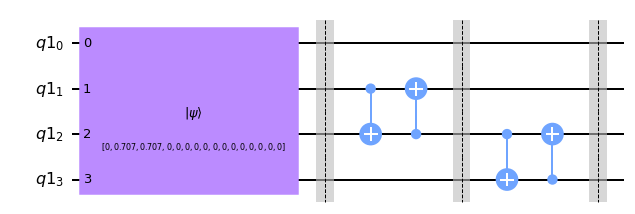

In [22]:
#Drawing the quantum circuit
qr_1 = QuantumRegister(4)
qc_test = QuantumCircuit(qr_1)
initial_state=IS
qc_test.initialize(initial_state,[0,1,2,3])
v1 = qc_test.save_statevector(label='v1')
qc_test.cx(1,2)
qc_test.cx(2,1)
v15 = qc_test.save_statevector(label='v15')
qc_test.cx(2,3)
qc_test.cx(3,2)

v2 = qc_test.save_statevector(label='v2')
qc_testj = assemble(qc_test)
result = sim.run(qc_testj).result()
qc_test.draw(output='mpl')

In [23]:
# #Drawing the quantum circuit
# qr_1 = QuantumRegister(4)
# qc_test = QuantumCircuit(qr_1)
# initial_state=[x1,0,0,x1,0,0,0,0,0,0,0,0,0,0,0,0]
# qc_test.initialize(initial_state,[0,1,2,3])
# v1 = qc_test.save_statevector(label='v1')
# qc_test.swap(1,2)
# qc_test.swap(2,3)


# v2 = qc_test.save_statevector(label='v2')
# qc_testj = assemble(qc_test)
# result = sim.run(qc_testj).result()
# qc_test.draw(output='mpl')


In [24]:
# Display the output state vector
psi_test_in = result.data(0)['v1']
psi_test_out = result.data(0)['v2']


display(psi_test_in.draw('latex'),
        psi_test_out.draw('latex'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [25]:
#Define Density Matrix for qc_test
rho_in = DensityMatrix(psi_test_in)
rho_out = DensityMatrix(psi_test_out)


rho_in.draw('latex')
rho_out.draw('latex')

<IPython.core.display.Latex object>

In [26]:
#print(entropy(D_A), entropy(D_B), entropy(D_C), entropy(D_AB), entropy(D_AC), entropy(D_BC))

In [27]:
#Density Matrices tracing over qubits 2,3 for both the initial state and the output. 
rho_12_in = partial_trace(rho_in,[2,3])
rho_12_out = partial_trace(rho_out,[2,3])
rho_13_in = partial_trace(rho_in,[1,3])
rho_13_out = partial_trace(rho_out,[1,3])
rho_14_in = partial_trace(rho_in,[1,2])
rho_14_out = partial_trace(rho_out,[1,2])
rho_34_in = partial_trace(rho_in,[0,1])
rho_34_out = partial_trace(rho_out,[0,1])
rho_24_out = partial_trace(rho_out,[0,2])
rho_23_out = partial_trace(rho_out,[1,3])

#out density matrix of the quantum channel
rho_234_out = partial_trace(rho_out,[0])
#output state read on qubit 4 from the quantum channel
rho_1_in = partial_trace(rho_in,[1,2,3])
rho_1_out = partial_trace(rho_out,[1,2,3])
rho_2_in = partial_trace(rho_in,[0,2,3])
rho_2_out = partial_trace(rho_out,[0,2,3])
rho_3_in = partial_trace(rho_in,[0,1,3])
rho_3_out = partial_trace(rho_out,[0,1,3])
rho_4_in = partial_trace(rho_in,[0,1,2])
rho_4_out = partial_trace(rho_out,[0,1,2])

display(rho_12_in.draw('latex', prefix=" \\rho_{12\_in} = "),
        rho_12_out.draw('latex', prefix=" \\rho_{12\_out} = "),
        rho_14_in.draw('latex', prefix=" \\rho_{14\_in} = "),
        rho_14_out.draw('latex', prefix=" \\rho_{14\_out} = "),
        rho_4_out.draw('latex', prefix=" \\rho_{4\_out} = "),
        rho_234_out.draw('latex', prefix=" \\rho_{234\_out} = "))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [13]:
#Entropies of our reduced density matrices. 
print(entropy(rho_12_in),entropy(rho_12_out),entropy(rho_14_in),entropy(rho_14_out), entropy(rho_23_out))

0.0 0.9999999999999999 0.0 0.9999999999999999 0.0


In [14]:
#Check for Purtity
rho_12_in_squared = np.matmul(rho_12_in,rho_12_in)
purity1=np.matrix.trace(rho_12_in_squared)
print(purity1)

(1.0000000000000004+0j)


In [15]:
#Mutual Information of qubit 1 and 4 for the initial state and for the output. MI of 0 has no entanglement and MI of 2 is
#maximally entangled. 
print(mutual_information(rho_12_in),mutual_information(rho_12_out))
print(mutual_information(rho_13_in),mutual_information(rho_13_out))
print(mutual_information(rho_14_in),mutual_information(rho_14_out))
print(mutual_information(rho_34_in),mutual_information(rho_34_out))

0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0


In [16]:
#coherent information through the quantum channel (the bottom three qubits.)
entropy(rho_1_in)-entropy(rho_14_out)

-0.9999999999999999

In [17]:
#Entanglement is created through this circuit on q_3 and q_4

print(entropy(rho_1_in),entropy(rho_2_in),entropy(rho_3_in),entropy(rho_4_in))
print(entropy(rho_1_out),entropy(rho_2_out),entropy(rho_3_out),entropy(rho_4_out))

0.0 0.0 1.6017132519074586e-16 0.0
0.0 0.9999999999999999 0.0 0.9999999999999999


In [18]:
mutual_information(rho_23_out)

0.0

In [19]:
entropy(rho_12_in)

0.0

# 